In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [3]:
# Load csv file
df = pd.read_csv('data/outfit.csv')
#df.transpose()

### Pieces distribution in outfits

In [4]:
df2 = splitDataFrameList(df,"pieces",";")
#df2.transpose()

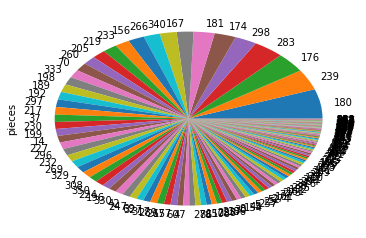

In [5]:
df2["pieces"].fillna("Nan").value_counts().plot.pie()
plt.show()

### Add hierarchial index

In [6]:
df2_hier = df2.reset_index()
df2_hier.columns = 'id body outfit_id pieces style weather'.split()
df2_hier.transpose()
#df2_hier.pivot_table(values='body',index=['id','pieces'],columns=['weather'])

pivot_table = df2_hier.pivot_table(index=['outfit_id','id'], values=['pieces'], aggfunc=lambda x: "aaa"+x)
#pivot_table.transpose()

### Weather distribution in outfits

In [7]:
df3 = splitDataFrameList(df,"weather",";")
df4 = df3[["outfit_id","weather"]]
df4.columns = 'outfit_id weather_category_id'.split()
#df4.transpose()

In [8]:
# Weather dictionary
weather = {
#        -1: "Unknown",
        1: "Freezing",
        2: "Cold",
        3: "Chilly",
        4: "Fresh",
        5: "Warm",
        6: "Hot",
        7: "Wind",
        8: "Rain",
        9: "Snow"
    }
# Weather category dictionary 
df_weathercat = pd.DataFrame(weather, index=['weather_category_name']).transpose()
# Add index column
df_weathercat.reset_index(inplace=True)
df_weathercat.columns = 'weather_category_id weather_category_name'.split()
# Change weather_id values to string - there is no "inplace" version of this!?
df_weathercat["weather_category_id"] = df_weathercat["weather_category_id"].apply(lambda x: str(x))
df_weathercat

,weather_category_id,weather_category_name
0,1,Freezing
1,2,Cold
2,3,Chilly
3,4,Fresh
4,5,Warm
5,6,Hot
6,7,Wind
7,8,Rain
8,9,Snow


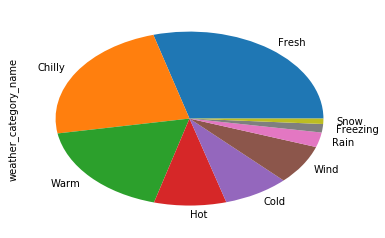

In [9]:
# Left outer join.
pd.merge(df4,df_weathercat,how='left',on='weather_category_id')["weather_category_name"].fillna("Nan").value_counts().plot.pie()
plt.show()